In [12]:
import pandas as pd
data = pd.read_csv('sgd_2022.csv')
print(data.head())


           Datetime Opponent Club    League Type Match Type Result
0  14-01-2022 18:30       Hamburg  2. Bundesliga       Home   Draw
1  23-01-2022 13:30      Hannover  2. Bundesliga       Away   Draw
2  06-02-2022 14:30       Rostock  2. Bundesliga       Home   Lose
3  12-02-2022 13:30     Paderborn  2. Bundesliga       Away   Draw
4  18-02-2022 19:30    Heidenheim  2. Bundesliga       Home   Draw


In [13]:
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')

data['Date'] = data['Datetime'].dt.date
data['Time'] = data['Datetime'].dt.time


In [14]:
print(data.head())

             Datetime Opponent Club    League Type Match Type Result  \
0 2022-01-14 18:30:00       Hamburg  2. Bundesliga       Home   Draw   
1 2022-01-23 13:30:00      Hannover  2. Bundesliga       Away   Draw   
2 2022-02-06 14:30:00       Rostock  2. Bundesliga       Home   Lose   
3 2022-02-12 13:30:00     Paderborn  2. Bundesliga       Away   Draw   
4 2022-02-18 19:30:00    Heidenheim  2. Bundesliga       Home   Draw   

         Date      Time  
0  2022-01-14  18:30:00  
1  2022-01-23  13:30:00  
2  2022-02-06  14:30:00  
3  2022-02-12  13:30:00  
4  2022-02-18  19:30:00  


['Draw' 'Win' 'Lose']


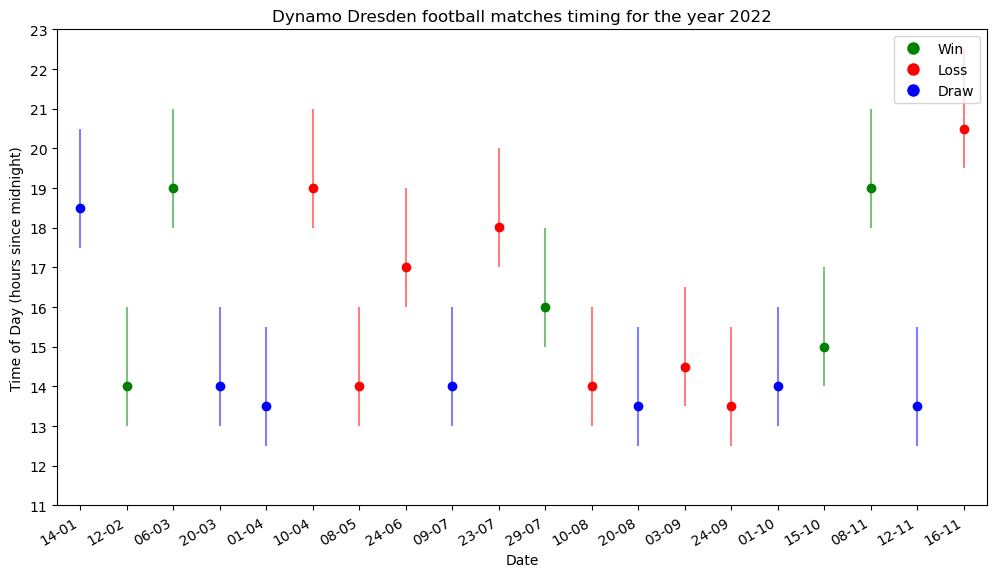

Total number of matches: 20


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('sgd_2022.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')


data['Date'] = data['Datetime'].dt.date
data['Time'] = data['Datetime'].dt.time


data['Hours Since Midnight'] = data['Datetime'].dt.hour + data['Datetime'].dt.minute / 60


data = data.sample(n=20)  


print(data['Result'].unique())


result_colors = {'Win': 'green', 'Loss': 'red', 'Draw': 'blue', 'Lose': 'red'}

# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 7))

# Create a parameter variable for evenly spaced ticks
param = np.arange(len(data))


for i, (index, row) in enumerate(data.iterrows()):
    ax.scatter(param[i], row['Hours Since Midnight'], color=result_colors[row['Result']])
    ax.vlines(param[i], row['Hours Since Midnight'] - 1, row['Hours Since Midnight'] + 2, color=result_colors[row['Result']], alpha=0.5)


ax.set_xlabel('Date')
ax.set_ylabel('Time of Day (hours since midnight)')
ax.set_title('Dynamo Dresden football matches timing for the year 2022')


match_dates = sorted(data['Datetime'].unique())

ax.set_xticks(param)
ax.set_xticklabels([date.strftime('%d-%m') for date in match_dates])

ax.set_xlim([-0.5, len(data) - 0.5])

ax.set_yticks(range(11, 24))

fig.autofmt_xdate()


legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Win', markersize=10, markerfacecolor='green'),
    plt.Line2D([0], [0], marker='o', color='w', label='Loss', markersize=10, markerfacecolor='red'),
    plt.Line2D([0], [0], marker='o', color='w', label='Draw', markersize=10, markerfacecolor='blue')
]

ax.legend(handles=legend_elements, loc='best')

plt.show()

total_matches = len(data)
print("Total number of matches:", total_matches)


In [23]:
## Map visualization

In [27]:
import folium
import pandas as pd
import re


file_path = 'pcs_meta.csv'  
data = pd.read_csv(file_path)


def extract_coordinates(geom):
    if pd.notna(geom):
        match = re.search(r'POINT \(([^ ]+) ([^ ]+)\)', geom)
        if match:
            longitude, latitude = match.groups()
            return float(latitude), float(longitude)
    return None, None

data[['latitude', 'longitude']] = data['geom'].apply(lambda x: pd.Series(extract_coordinates(x)))


data = data.dropna(subset=['latitude', 'longitude'])


map_center = [data['latitude'].mean(), data['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)


for _, row in data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Location: {row['location']}<br>Lane: {row['lane']}<br>Sensor ID: {row['pcs_id']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mymap)


mymap.save('sensor_locations_map.html')

print("Map has been saved as 'sensor_locations_map.html'.")


Map has been saved as 'sensor_locations_map.html'.


In [28]:
import folium
import pandas as pd
import re
from IPython.display import display


file_path = 'pcs_meta.csv'  # Adjust this path if necessary
data = pd.read_csv(file_path)


def extract_coordinates(geom):
    if pd.notna(geom):
        match = re.search(r'POINT \(([^ ]+) ([^ ]+)\)', geom)
        if match:
            longitude, latitude = match.groups()
            return float(latitude), float(longitude)
    return None, None


data[['latitude', 'longitude']] = data['geom'].apply(lambda x: pd.Series(extract_coordinates(x)))


data = data.dropna(subset=['latitude', 'longitude'])


map_center = [data['latitude'].mean(), data['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)


for _, row in data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Location: {row['location']}<br>Lane: {row['lane']}<br>Sensor ID: {row['pcs_id']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mymap)

display(mymap)


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'sample_vamos_data_2022_23.csv'
data = pd.read_csv(file_path)

# Inspect the first few rows and info of the dataset
print("Dataset preview:")
print(data.head())
print("\nDataset info:")
print(data.info())

# Ignore rows with missing data
data_cleaned = data.dropna()

# Convert 'time' column to datetime and handle errors
data_cleaned.loc[:, 'time'] = pd.to_datetime(data_cleaned['time'], format='%d-%m-%Y %H:%M', errors='coerce')

# Check the conversion result
print("\nConversion to datetime:")
print(data_cleaned['time'].head())

# Drop rows where 'time' could not be parsed
data_cleaned = data_cleaned.dropna(subset=['time'])

# Ensure data is sorted by time
data_cleaned = data_cleaned.sort_values('time')

# Check if the DataFrame is empty after cleaning
if data_cleaned.empty:
    print("No valid data available after cleaning.")
else:
    # Aggregate data to visualize daily patterns
    data_cleaned['hour'] = data_cleaned['time'].dt.hour
    # Sum numeric columns, excluding 'time' and 's_idx'
    hourly_data = data_cleaned.groupby('hour')[['trafficVolumeHeavy', 'trafficVolumeLight']].sum().reset_index()

    # Check aggregated data
    print("\nAggregated hourly data:")
    print(hourly_data.head())

    # Time series plot for traffic volumes
    plt.figure(figsize=(12, 6))
    plt.plot(data_cleaned['time'], data_cleaned['trafficVolumeHeavy'], label='Heavy Traffic Volume', color='red')
    plt.plot(data_cleaned['time'], data_cleaned['trafficVolumeLight'], label='Light Traffic Volume', color='blue')
    plt.title('Traffic Volume Over Time')
    plt.xlabel('Time')
    plt.ylabel('Traffic Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save or show plot
    plt.savefig('traffic_volume_time_series.png')
    plt.show()

    # Distribution plot for hourly traffic volumes
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=hourly_data, x='hour', y='trafficVolumeHeavy', label='Heavy Traffic Volume', color='red')
    sns.lineplot(data=hourly_data, x='hour', y='trafficVolumeLight', label='Light Traffic Volume', color='blue')
    plt.title('Hourly Traffic Volume Distribution')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Traffic Volume')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save or show plot
    plt.savefig('hourly_traffic_volume_distribution.png')
    plt.show()


Dataset preview:
                  time  s_idx  speed  netTimeGap  occupiedTime  vehicleLength  \
0  2022-01-01 00:00:00    493   50.0     76100.0         289.0            4.0   
1  2022-01-01 00:01:00    493   47.0     51510.0         376.0            4.9   
2  2022-01-01 00:02:00    493   50.0         0.0           0.0            0.0   
3  2022-01-01 00:03:00    493   50.0         0.0           0.0            0.0   
4  2022-01-01 00:04:00    493   50.0         0.0           0.0            0.0   

   trafficVolumeHeavy  trafficVolumeLight  
0                 0.0                 1.0  
1                 0.0                 1.0  
2                 0.0                 0.0  
3                 0.0                 0.0  
4                 0.0                 0.0  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18083520 entries, 0 to 18083519
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   time                object 
 1  

In [40]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import pickle

# Load the CSV file
data = pd.read_csv('pcs_meta.csv')

# Extract latitude and longitude from the 'geom' column
data[['longitude', 'latitude']] = data['geom'].str.extract(r'POINT \((.*) (.*)\)')
data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')

# Drop rows with NaN coordinates
data.dropna(subset=['latitude', 'longitude'], inplace=True)

# Define a function to calculate distance between two points
def calculate_distance(row1, row2):
    point1 = (row1['latitude'], row1['longitude'])
    point2 = (row2['latitude'], row2['longitude'])
    return geodesic(point1, point2).meters

# Create an empty adjacency matrix
num_sensors = len(data)
adjacency_matrix_connectivity = np.zeros((num_sensors, num_sensors), dtype=np.float32)
adjacency_matrix_distance = np.zeros((num_sensors, num_sensors), dtype=np.float32)

# Define a threshold distance (e.g., 500 meters) for adjacency
threshold_distance = 500

# Fill the adjacency matrix
for i in range(num_sensors):
    for j in range(i + 1, num_sensors):
        distance = calculate_distance(data.iloc[i], data.iloc[j])
        if distance <= threshold_distance:
            adjacency_matrix_connectivity[i, j] = 1
            adjacency_matrix_connectivity[j, i] = 1
            adjacency_matrix_distance[i, j] = distance
            adjacency_matrix_distance[j, i] = distance

# Save the adjacency matrices to pickle files
with open('adj_PCS_meta_connectivity.pkl', 'wb') as f:
    pickle.dump(adjacency_matrix_connectivity, f)

with open('adj_PCS_meta_distance.pkl', 'wb') as f:
    pickle.dump(adjacency_matrix_distance, f)

# Print the adjacency matrices
print("Connectivity-based Adjacency Matrix:")
print(adjacency_matrix_connectivity)

print("Distance-based Adjacency Matrix:")
print(adjacency_matrix_distance)


Connectivity-based Adjacency Matrix:
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
Distance-based Adjacency Matrix:
[[ 0.         3.1619618 43.27397   ...  0.         0.         0.       ]
 [ 3.1619618  0.        42.19781   ...  0.         0.         0.       ]
 [43.27397   42.19781    0.        ...  0.         0.         0.       ]
 ...
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         0.         4.4717183]
 [ 0.         0.         0.        ...  0.         4.4717183  0.       ]]


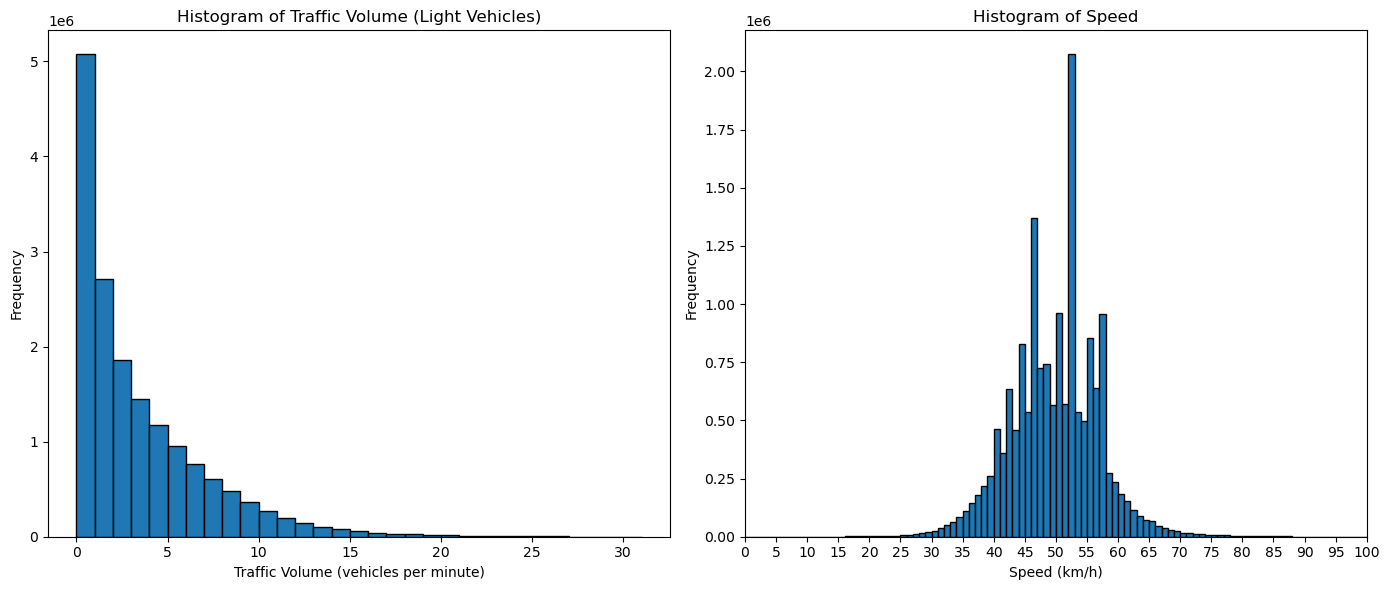

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('sample_vamos_data_2022_23.csv')

data['time'] = pd.to_datetime(data['time'])

traffic_volume_light = data['trafficVolumeLight']
speed = data['speed']

speed_filtered = speed[(speed != 0) & (~speed.isna()) & (speed <= 100)]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


ax1.hist(traffic_volume_light, bins=range(0, 32), edgecolor='black', range=(0, 30))
ax1.set_xlabel('Traffic Volume (vehicles per minute)')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Traffic Volume (Light Vehicles)')
ax1.set_xticks(range(0, 31, 5))

ax2.hist(speed_filtered, bins=range(0, 101), edgecolor='black')
ax2.set_xlabel('Speed (km/h)')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Speed')
ax2.set_xticks(range(0, 101, 5))
ax2.set_xlim(0, 100)


plt.tight_layout()

plt.show()


Selected sensor IDs: [1288 1295  397  501]


C:\Users\Malay Gaherwar\AppData\Local\Temp\ipykernel_12112\4047868737.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_data['minute_of_day'] = sensor_data['time'].dt.hour * 60 + sensor_data['time'].dt.minute
C:\Users\Malay Gaherwar\AppData\Local\Temp\ipykernel_12112\4047868737.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_data['hour_of_day'] = sensor_data['time'].dt.hour
C:\Users\Malay Gaherwar\AppData\Local\Temp\ipykernel_12112\4047868737.py:28: SettingWithCopyWarning: 
A value is 

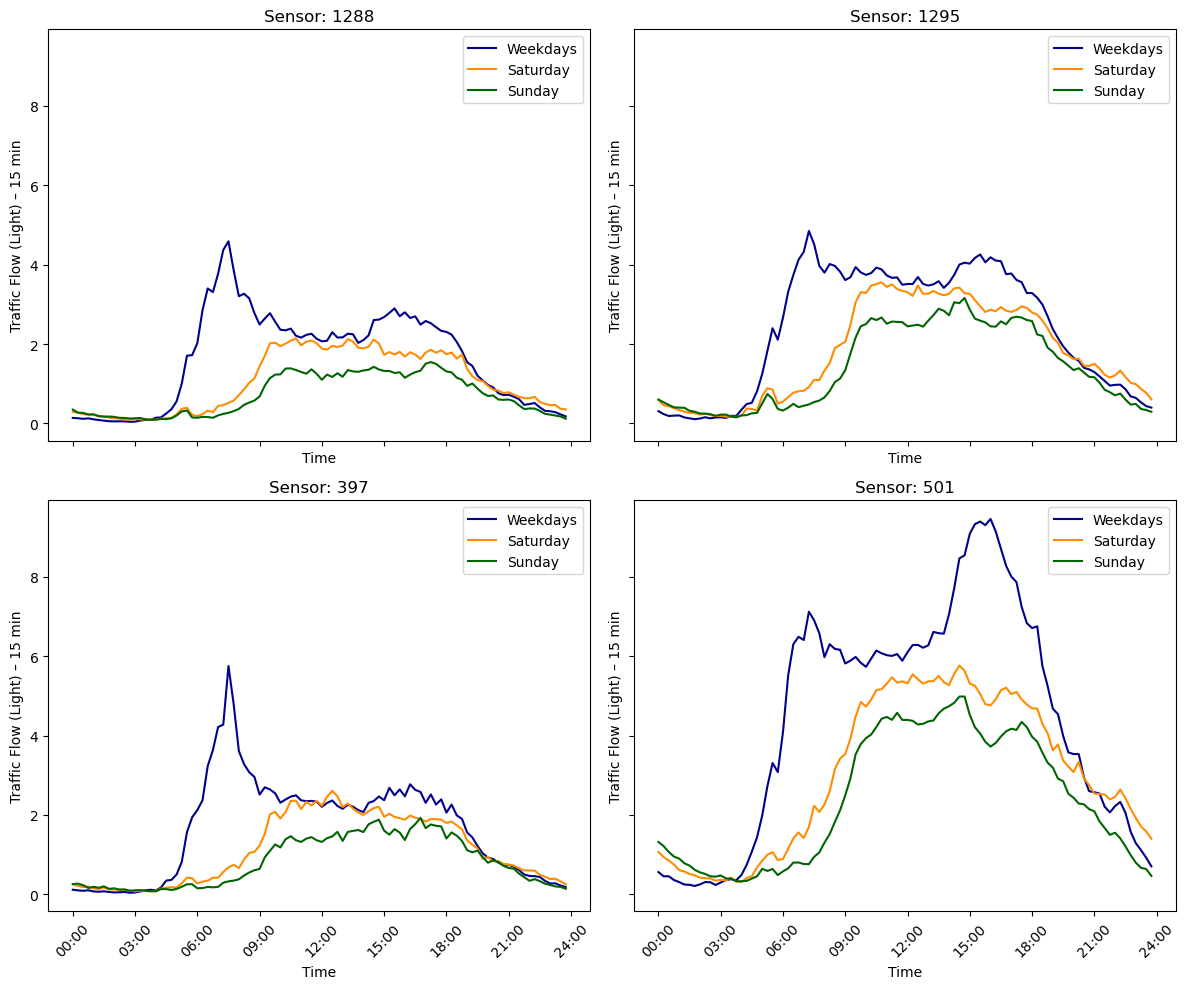

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('sample_vamos_data_2022_23.csv')

data['time'] = pd.to_datetime(data['time'])

selected_sensors = np.random.choice(data['s_idx'].unique(), 4, replace=False)
print(f"Selected sensor IDs: {selected_sensors}")


fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)


axes = axes.flatten()

for i, sensor in enumerate(selected_sensors):
    
    sensor_data = data[data['s_idx'] == sensor]

    sensor_data['minute_of_day'] = sensor_data['time'].dt.hour * 60 + sensor_data['time'].dt.minute
    sensor_data['hour_of_day'] = sensor_data['time'].dt.hour
    sensor_data['weekday'] = sensor_data['time'].dt.day_name()

    sensor_data['total_traffic_volume'] = sensor_data['trafficVolumeLight'] + sensor_data['trafficVolumeHeavy']

    sensor_data.set_index('time', inplace=True)

    # Resample the data to 15-minute intervals and calculate the mean traffic volume
    resampled_data = sensor_data['total_traffic_volume'].resample('15T').mean()

    weekdays_data = resampled_data[sensor_data['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
    saturday_data = resampled_data[sensor_data['weekday'] == 'Saturday']
    sunday_data = resampled_data[sensor_data['weekday'] == 'Sunday']

    # Resample the data into 15-minute intervals for the entire dataset
    weekday_avg = weekdays_data.groupby(weekdays_data.index.time).mean()
    saturday_avg = saturday_data.groupby(saturday_data.index.time).mean()
    sunday_avg = sunday_data.groupby(sunday_data.index.time).mean()

    # Ensure all 15-minute intervals are covered
    all_intervals = pd.date_range(start='00:00', end='23:45', freq='15T').time
    weekday_avg = weekday_avg.reindex(all_intervals, fill_value=0)
    saturday_avg = saturday_avg.reindex(all_intervals, fill_value=0)
    sunday_avg = sunday_avg.reindex(all_intervals, fill_value=0)

    # Plot lines for weekdays, Saturday, and Sunday without markers
    axes[i].plot([f"{t.hour:02d}:{t.minute:02d}" for t in all_intervals], weekday_avg.values, color='darkblue', linestyle='-', linewidth=1.5, label='Weekdays')
    axes[i].plot([f"{t.hour:02d}:{t.minute:02d}" for t in all_intervals], saturday_avg.values, color='darkorange', linestyle='-', linewidth=1.5, label='Saturday')
    axes[i].plot([f"{t.hour:02d}:{t.minute:02d}" for t in all_intervals], sunday_avg.values, color='darkgreen', linestyle='-', linewidth=1.5, label='Sunday')

    axes[i].set_title(f'Sensor: {sensor}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Traffic Flow (Light) – 15 min')

    # Format x-axis to show every 3 hours
    axes[i].xaxis.set_major_locator(plt.MultipleLocator(12))  # Major ticks every 3 hours (12 x 15 minutes)
    axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x // 4):02d}:00'))
    axes[i].tick_params(axis='x', rotation=45)

for ax in axes:
    ax.legend()

plt.tight_layout()


plt.savefig('traffic_flow_sensors.png', dpi=300)

plt.show()


In [9]:
import numpy as np
import pandas as pd

# Load the .npz file
npz_file = np.load('BasicTS/datasets/raw_data/PEMS03/PEMS03.npz')

# Print the keys of the npz file to understand the structure
print("Keys in the npz file:", npz_file.keys())

# Extract the relevant array
data_key = 'data'  # Replace with the actual key
data_array = npz_file[data_key]

# Check the shape of the array
timesteps, locations, features = data_array.shape
print(f"Shape of the array: timesteps={timesteps}, locations={locations}, features={features}")

# Display the first 10 timesteps for each feature separately
features_names = ['flow', 'occupancy', 'speed']
dfs = {}

for i, feature in enumerate(features_names):
    feature_data = data_array[:, :, i]  # Extract data for the current feature
    df = pd.DataFrame(feature_data[:10])
    dfs[feature] = df
    print(f"\nFirst 10 timesteps for {feature}:")
    print(df)

# Combine the data into a single dictionary of DataFrames
combined_df = pd.concat(dfs, axis=1)
print("\nCombined DataFrame with first 10 timesteps for each feature:")
print(combined_df)


Keys in the npz file: KeysView(NpzFile 'BasicTS/datasets/raw_data/PEMS03/PEMS03.npz' with keys: data)
Shape of the array: timesteps=26208, locations=358, features=1

First 10 timesteps for flow:
    0     1      2      3     4      5      6     7     8      9    ...  \
0  20.0  20.0  182.0  182.0  91.0  182.0  136.0  91.0  91.0  136.0  ...   
1  22.0  22.0  174.0  174.0  87.0  174.0  131.0  87.0  87.0  131.0  ...   
2  22.0  22.0  183.0  183.0  92.0  183.0  139.0  92.0  92.0  139.0  ...   
3  50.0  49.0  137.0  139.0  60.0  158.0  111.0  57.0  55.0   99.0  ...   
4  37.0  35.0  128.0  123.0  54.0  131.0  111.0  46.0  52.0   78.0  ...   
5  55.0  60.0  118.0  113.0  58.0   95.0   86.0  44.0  45.0   54.0  ...   
6  42.0  40.0  129.0  129.0  48.0  137.0  115.0  45.0  48.0   57.0  ...   
7  45.0  45.0   97.0   96.0  52.0  117.0   87.0  30.0  33.0   70.0  ...   
8  33.0  32.0   94.0   90.0  52.0  107.0   78.0  40.0  41.0   44.0  ...   
9  50.0  51.0  106.0   94.0  42.0  114.0   88.0  39.0  

IndexError: index 1 is out of bounds for axis 2 with size 1

In [15]:
import pickle
import pandas as pd
import numpy as np
import os
from prettytable import PrettyTable

def display_pkl_file(filepath):
    # Check if the file exists
    if not os.path.exists(filepath):
        print(f"File {filepath} does not exist.")
        return
    
    # Load the pickle file
    with open(filepath, 'rb') as file:
        data = pickle.load(file)
    
    # Check the type of data to display it accordingly
    if isinstance(data, np.ndarray):
        # If data is a NumPy array, convert it to DataFrame for better display
        df = pd.DataFrame(data)
        print("Displaying data as DataFrame:")
        display(df.head())
        print(df.to_string())
    elif isinstance(data, dict):
        # If data is a dictionary, use PrettyTable to display it
        table = PrettyTable()
        table.field_names = ["Key", "Value"]
        for key, value in data.items():
            table.add_row([key, value])
        print("Displaying data as dictionary:")
        print(table)
    elif isinstance(data, (list, tuple)):
        # If data is a list or tuple, use PrettyTable to display it
        table = PrettyTable()
        table.field_names = ["Index", "Value"]
        for idx, value in enumerate(data):
            table.add_row([idx, value])
        print(f"Displaying data as {'list' if isinstance(data, list) else 'tuple'}:")
        print(table)
    else:
        # For other data types, just print the data
        print("Displaying raw data:")
        print(data)

# Filepath to the pickle file
filepath = "BasicTS/datasets/raw_data/PEMS03/adj_PEMS03.pkl"

# Display the content of the pickle file
display_pkl_file(filepath)


Displaying data as DataFrame:


,0,1,2,3,4,5,6,7,8,9,...,348,349,350,351,352,353,354,355,356,357
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96   97   98   99   100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192  193  194  195  196  197  198  